## Import Libraries

In [106]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

## Create Espresso Instances

In [123]:
git_repo_folder='/Users/josesho/bin/git-repos/espresso'

datadir1=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/22')
datadir2=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/29')
datadir3=os.path.join(git_repo_folder,'data/starvation_gradient/0-Hrs')
datadir4=os.path.join(git_repo_folder,'data/starvation_gradient/24-Hrs')
datadir5=os.path.join(git_repo_folder,'data/starvation_gradient/48-Hrs')
datadir6=os.path.join(git_repo_folder,'data/24-Hrs-starved-choice')

twotubes22=esp.espresso(folder=datadir1)
twotubes29=esp.espresso(folder=datadir2)

starvation0=esp.espresso(folder=datadir3)
starvation0.attach_label(label_name='starved_time',label_value='0-Hrs')

starvation24=esp.espresso(folder=datadir4)
starvation24.attach_label(label_name='starved_time',label_value='24-Hrs')

starvation48=esp.espresso(folder=datadir5)
starvation48.attach_label(label_name='starved_time',label_value='48-Hrs')
starved=starvation0+starvation24+starvation48

starved_choice=esp.espresso(folder=datadir6)

tubes=twotubes22+twotubes29

starved_time has been added as a new label, with '0-Hrs' as the custom value.
starved_time has been added as a new label, with '24-Hrs' as the custom value.
starved_time has been added as a new label, with '48-Hrs' as the custom value.


## Plot Development

In [124]:
tubes

2 feedlogs with a total of 60 flies.
3 genotypes ['w1118;Trh-Gal4' 'w1118;UAS-Gz-TrpA1;Trh-Zal'
 'Trh-Gal4>UAS-GZ-TrpA1_Trh-ZAL'].
2 temperatures [22 29].
1 foodtype ['5% sucrose + 5% yeast extract'].

In [127]:
df=tubes.feeds
group_by='Genotype'
color_by='Temperature'
resample_by='10min'

In [149]:
# Convert RelativeTime_s to datetime if not done so already.
if df.RelativeTime_s.dtype=='float64':
    df.loc[:,'RelativeTime_s']=pd.to_datetime(df['RelativeTime_s'],unit='s')

# Create the `groupby.resamp` pandas object
df_groupby_resamp_sum=df.groupby([group_by,color_by,'FlyID'])\
                        .resample(resample_by,on='RelativeTime_s')\
                        .sum()
# df_groupby_resamp_sum=pd.DataFrame( df_groupby_resamp_sum.to_records() )

# df_groupby_resamp_cumsum=df_groupby_resamp_sum.groupby([group_by,color_by,'FlyID'])\
#                                               .cumsum()\
#                                               .groupby([group_by,color_by,'FlyID'])\
#                                               .fillna(method='pad')\
#                                               .fillna(0)
            
# df_groupby_resamp_cumsum=pd.DataFrame( df_groupby_resamp_cumsum.to_records() )
# # Drop extraneous columns.
# df_groupby_resamp_cumsum=df_groupby_resamp_cumsum[[group_by,color_by,
#                                              'FlyID',
#                                              'RelativeTime_s',
#                                              'FlyCountInChamber',
#                                              ### Below, add all the columns that are
#                                              ### potentially used for timecourse plotting.
#                                              'AverageFeedVolumePerFly_µl',
#                                              'AverageFeedCountPerFly',
#                                              'AverageFeedSpeedPerFly_µl/s']]

# # # Add time column (in minutes) to facilitate plotting.
# rt=df_groupby_resamp_cumsum.loc[:,'RelativeTime_s']
# df_groupby_resamp_cumsum['time_s']=rt.dt.hour*3600+rt.dt.minute*60+rt.dt.second

# df_groupby_resamp_cumsum.rename( columns={'AverageFeedVolumePerFly_µl':'Cumulative Volume (nl)',
#                                          'AverageFeedCountPerFly':'Cumulative Feed Count',
#                                          },
#                              inplace=True)

In [156]:
[col for col in [group_by,color_by] if col in df_groupby_resamp_sum.columns]

['Temperature']

In [ ]:
df_groupby_resamp_sum.drop()

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


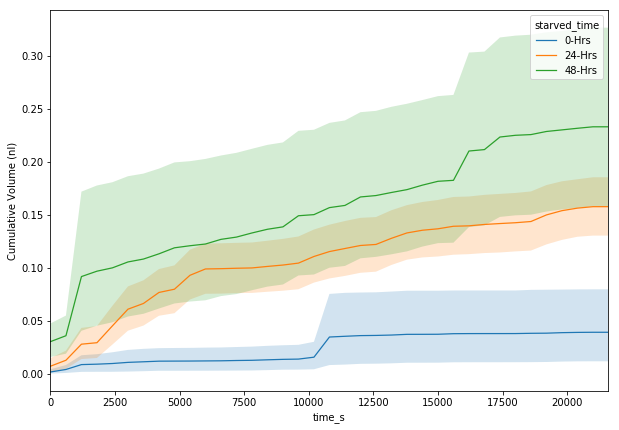

In [121]:
groupby_grps=np.sort( df_groupby_resamp_cumsum[group_by].unique() )
num_plots=int( len(groupby_grps) )

x_inches=10*num_plots
y_inches=7
    
fig,axx=plt.subplots(nrows=1,
                      ncols=num_plots,
                      figsize=(x_inches,y_inches),
                      gridspec_kw={'wspace':0.2} )

# Loop through each panel.
for c, grp in enumerate( groupby_grps ):
    if len(groupby_grps)>1:
        plotax=axx[c]
    else:
        plotax=axx
        
    ## Filter plotdf according to group_by.
    temp_plotdf=df_groupby_resamp_cumsum[df_groupby_resamp_cumsum[group_by]==grp]

    ### and make timeseries plot.
    sns.tsplot(data=temp_plotdf,ci=95,ax=plotax,
               time='time_s',unit='FlyID',
               condition=color_by,
               value='Cumulative Volume (nl)',
            #    color=genotype_palette,
            #    alpha=temp_alpha,
               linewidth=1.25)
